# Sentiment Analysis of Product Reviews
This notebook demonstrates the full workflow of building a sentiment analysis model.

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [3]:
df = pd.read_csv("../data/simulated_reviews.csv")
df.head()

,Review,Sentiment
0,I love this product! It's amazing.,Positive
1,"Terrible experience, never buying again.",Negative
2,"The quality is okay, not great.",Neutral
3,Absolutely fantastic service!,Positive
4,Worst product I’ve ever used.,Negative


## Exploratory Data Analysis

In [4]:
df['Sentiment'].value_counts()

Sentiment
Positive    4
Negative    4
Neutral     2
Name: count, dtype: int64

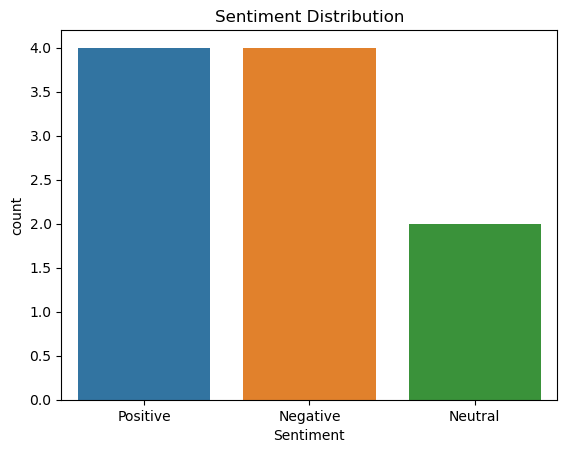

In [5]:
sns.countplot(data=df, x='Sentiment')
plt.title("Sentiment Distribution")
plt.show()

## Preprocessing and Model Training

In [6]:
X = df["Review"]
y = df["Sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

## Model Evaluation

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
    Positive       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\Amit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


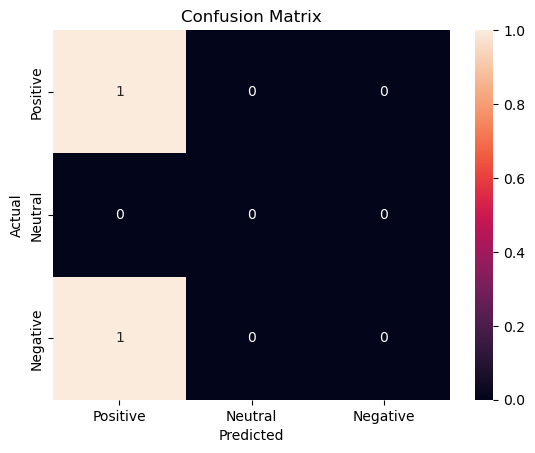

In [8]:
conf_mat = confusion_matrix(y_test, y_pred, labels=["Positive", "Neutral", "Negative"])
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=["Positive", "Neutral", "Negative"], yticklabels=["Positive", "Neutral", "Negative"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Save Trained Model

In [ ]:
import os
os.makedirs("model", exist_ok=True)
with open("model/sentiment_model.pkl", "wb") as f:
    pickle.dump(pipeline, f)